<a href="https://colab.research.google.com/github/ibojovic/LB2_2022/blob/main/vonHeijne_part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from math import sqrt
from sklearn.metrics import precision_recall_curve, f1_score, accuracy_score, matthews_corrcoef, classification_report, confusion_matrix


In [ ]:
df = pd.read_csv('training_set.tsv',sep = '\t')
df_benchmark = pd.read_csv('benchmark_set.tsv',sep = '\t')
df

,UniProtKB accession,Taxa,Kingdom,Class,Cross-validation fold,Sequence (first 50 N-terminal residues),SP cleavage-site annotation
0,P61916,Homo sapiens (Human),Metazoa,SP,0,MRFLAATFLLLALSTAAQAEPVQFKDCGSVDGVIKEVNVSPCPTQP...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1,Q7M3V1,Chelonus sp. nr. curvimaculatus (Parasitic wasp),Metazoa,SP,0,MAGKEVIFIMALFIAVESSPIFSFDDLVCPSVTSLRVNVEKNECST...,SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...
2,Q08738,Bombyx mori (Silk moth),Metazoa,SP,0,MRVFLAICLSLTVALAAETGKYTPFQYNRVYSTVSPFVYKPGRYVA...,SSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
3,Q41350,Solanum lycopersicum (Tomato) (Lycopersicon es...,Plants,SP,0,MASSSAKILLPLSLLFTLLSLSQSTNPNFILTLVNNCPYTIWPAIQ...,SSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNN...
4,Q86SE1,Androctonus amoreuxi (African fattail scorpion...,Metazoa,SP,0,MNYLVMISLALLLMIGVESVRDGYIVYPHNCVYHCIPSCDGLCKEN...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...
...,...,...,...,...,...,...,...
1718,P62597,Gallus gallus (Chicken),Metazoa,NO_SP,4,MPVQVLKIIKGKPETQLPSHLQREDLKHLQTGLDHTNKYFQGIVIL...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1719,Q7K4M4,Drosophila melanogaster (Fruit fly),Metazoa,NO_SP,4,MSKFLDMLSGSQCVSLEKCGDVVVSTNDCMIALYCHFCRDLFTQLP...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1720,Q14146,Homo sapiens (Human),Metazoa,NO_SP,4,MAAVYSGISLKLKSKTTSWEDKLKLAHFAWISHQCFLPNKEQVLLD...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1721,B2RWS6,Mus musculus (Mouse),Metazoa,NO_SP,4,MAENVVEPGPPSAKRPKLSSPALSASASDGTDFGSLFDLEHDLPDE...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...


In [ ]:
#read the file in a dataframe
df = pd.read_csv('training_set.tsv',sep = '\t')
#select only the ones that are class sp
df_sp = df.query("Class == 'SP'")
#I calculate the length of the site
sp_length = df_sp['SP cleavage-site annotation'].str.count('S').tolist()
#I add a new column with the lengths
df_sp = df_sp.assign(s_length= sp_length)

#extract the cleavage sequences
cleavage_sequences = []
for sequence in df_sp['Sequence (first 50 N-terminal residues)']:
  for n in df_sp['s_length']:
    cleavage_sequences.append(sequence[:n])
cleavage_sequences


length = df_sp['s_length']
seq = df_sp['Sequence (first 50 N-terminal residues)']
#calculates the cleavage site
cleavage_seq=[] #add to list all the cleaveage sites sequences
for l,s in zip(length, seq ):
    cleavage_seq.append(s[l - 13:l + 2])
cleavage_seq

training_seq_list_sp = cleavage_seq
training_seq_list_all = df['Sequence (first 50 N-terminal residues)']

In [ ]:
training_seq_list_sp

['TFLLLALSTAAQAEP',
 'FIMALFIAVESSPIF',
 'FLAICLSLTVALAAE',
 'LSLLFTLLSLSQSTN',
 'ISLALLLMIGVESVR',
 'IIFPNEFSKPTRAFS',
 'LFSTATLISTGWGLD',
 'ILLQFSAWTTTDAVT',
 'LLCLAAVLRQSFGNV',
 'VIAFSTVHQTVAAVD',
 'LLLLLASVSLALGDP',
 'GALFLALLAGAHAEF',
 'FSLALLLMTGVESVR',
 'DPIAEIERSNCKIAH',
 'VLTVLLMGTGCISAP',
 'FLTLVSFSNMSDQAG',
 'LLLLAGLAHGASALF',
 'ALLVLLFCFRGRAGP',
 'ISFALLLMKGVESVR',
 'VALLFSHVDHISAET',
 'LLWASLLSGVLAGRA',
 'WALLLLWSPCTFSLP',
 'IVVLLLVIAFSHGAV',
 'FLLFLIATTRGWSTD',
 'VLLVSCFLSQGAAIE',
 'LLFLVLSAGSGISGP',
 'LLALALILPGTLCAE',
 'LVLIAFTCYTCSDAT',
 'IFLVLLVATSAYAAP',
 'TLVLFLLAQVSWAGP',
 'SVFFLLLPGPSAADE',
 'LPILAAVLQQSSGNV',
 'ILLLLSLVASIFSTP',
 'LLFLVLSAGSGFTQG',
 'QSLTVSRGGLVAADR',
 'LVVTIVCLDLASTMI',
 'LPPLLLTPRAGDAAV',
 'ASLVFFLCQMISALD',
 'VAMSLVSCSTAAPAK',
 'LLALLLLAAAAEAAK',
 'VFVFCFLIKLLTGEL',
 'FLAVSLLCALANAYP',
 'VLALLLLCSYTCGSQ',
 'LGLFLLLPRPVPAPC',
 'FVLLLSEIVSISASS',
 'WFAIATLITICYAAK',
 'LWLPTSGLWTVQAMD',
 'CLMLAGLCSLVTSHL',
 'CAVLALVLAPAGAFR',
 'LLILACFVALALARA',


In [ ]:
# OK
#Training matrix
#Intialize the position-specific weight matrix (pswm) as a matrix of ones)

aa_list=['A','Q','L','S','R','E','K','T','N','G','M','W','D','H','F','Y','C','I','P','V']
aa_bc_list=[0.0825,0.0393,0.0965,0.0664,0.0553,0.0672,0.0580,0.0535,0.0406,0.0707,0.0241,0.0110,0.0546,0.0227,0.0386,0.0292,0.0138,0.0591,0.0474,0.0686]

def create_matrix(df, aa_list, aa_bc_list):
  '''This function creates the matrix used to score the predictions'''

  #create the cleavage sequences from the dataframe

  #select only the ones that are class sp
  df_sp = df.query("Class == 'SP'")
  #I calculate the length of the site
  sp_length = df_sp['SP cleavage-site annotation'].str.count('S').tolist()
  #I add a new column with the lengths
  df_sp = df_sp.assign(s_length = sp_length)

  length = df_sp['s_length']
  seq = df_sp['Sequence (first 50 N-terminal residues)']

  #calculates the cleavage site
  cleavage_seq=[] #add to list all the cleaveage sites sequences
  for l,s in zip(length, seq ):
    cleavage_seq.append(s[l - 13:l + 2])

  #creating a dictionary from the list of aminoacids and the percentages
  aa_bc_dict={}
  for i,j in zip(aa_list,aa_bc_list):
    aa_bc_dict[i]=j

  pswm = np.ones ((20,15))
  #create a dictionary to map in the right position
  aa_dict = {}
  for aa,i in zip (aa_list,range(20)):
    aa_dict[aa]=i

  for seq in cleavage_seq:
    for i in enumerate(seq):
      pswm[aa_dict[i[1]],i[0]]+=1 #insert in the matrix the weights
  pswm = pswm/(len(cleavage_seq)+20) #obtain the percentage

  for m,n in zip(range(len(pswm)),aa_list):
    for k in range(len(pswm[m])):
    #print(pswm[i][k])
      pswm[m][k] = np.log2(pswm[m][k]/aa_bc_dict[n])
  return pswm

#I call the function

create_matrix(df, aa_list,aa_bc_list)

array([[-0.27155149,  0.52491512,  0.650446  ,  0.18096072,  1.18096072,
         0.60980401,  0.12437719,  0.838073  ,  0.97237409,  0.12437719,
         1.56798384, -0.19755091,  2.46920568,  0.650446  , -0.71212408],
       [-1.86465169, -2.4496142 , -2.4496142 , -1.86465169, -2.4496142 ,
        -1.4496142 , -1.1276861 , -1.4496142 ,  0.4572764 , -0.1276861 ,
        -2.4496142 ,  1.25082552, -1.4496142 ,  0.35774073,  0.00981742],
       [ 2.07456514,  2.0225705 ,  1.85429902,  2.08727619,  1.61193818,
         1.89824236,  1.80897503,  1.2316661 , -0.57568882,  0.71381779,
        -1.9382589 ,  0.29878029, -2.42368573, -0.3532964 , -1.04517411],
       [-0.50582841, -0.3989132 , -0.29937753, -1.20626812,  0.04165939,
         0.1860493 ,  0.11565997, -0.20626812,  0.74792819,  0.25316349,
         0.92301489,  0.43758807,  0.92301489,  0.1860493 , -0.11880528],
       [-2.94236436, -2.94236436, -3.94236436, -3.94236436, -3.94236436,
        -3.94236436, -1.35740186, -2.94236436, 

In [ ]:
 #Now i have to predict the scores of the sequences in the training set
#Transform this in a function

aa_list=['A','Q','L','S','R','E','K','T','N','G','M','W','D','H','F','Y','C','I','P','V']

def predictions(pswm, aa_list, dataframe):
  '''This function calculates the predicted aminoacids'''
  dict_scores = {}
  for sequence, id in zip(dataframe['Sequence (first 50 N-terminal residues)'], dataframe['UniProtKB accession']):
    max_score = -1000
    for i in range(len(sequence)-14):
      seq_15 = sequence[i:i+15]
    #Now I need to calculate the score of the sequences and store in the dictionary only the best value
      score = 0
      for position,residue in enumerate(seq_15):
        score = score + pswm[aa_list.index(residue),position]
      if score > max_score:
        max_score = score
    dict_scores[id] = max_score
  return dict_scores

# I call the matrix function I used before
pswm = create_matrix(df, aa_list,aa_bc_list)

#I call the function to predict the scores
predictions(pswm, aa_list, df)


{'P61916': 14.543297253947026,
 'Q7M3V1': 7.479935719052482,
 'Q08738': 14.093130932989162,
 'Q41350': 13.865073369278152,
 'Q86SE1': 11.445876571151576,
 'Q8L5J1': 1.1379154839775287,
 'P35495': 9.88262598636033,
 'P20656': 9.920042815184383,
 'P84805': 11.269237336628807,
 'Q9LVC0': 6.563385135257306,
 'P12387': 18.253123071616184,
 'P55058': 14.361777414796823,
 'Q4TUA4': 13.920260126949461,
 'Q09117': 0.04198643386567169,
 'Q92154': 12.255627679691434,
 'P02742': 6.659474605818329,
 'P11438': 16.198844039295228,
 'Q6UWL6': 13.923591670158446,
 'O61705': 9.972604632677962,
 'P48765': 8.714845784038495,
 'Q2ULM2': 14.450891702784746,
 'P06281': 14.71202518890825,
 'Q5W280': 12.450975804024432,
 'Q8WWA0': 12.300216730727433,
 'P10607': 11.460660041084699,
 'P46169': 13.856566084376652,
 'P04275': 15.662538549012595,
 'P42660': 9.361459028617722,
 'P21828': 16.65590970523251,
 'Q01129': 17.170258639656748,
 'P80311': 14.066871992382506,
 'Q8JI40': 9.592258051737613,
 'Q5XM24': 14.09789

In [ ]:
#Function to calculate the true values
def true_values(df_training):
  '''This function takes the training data after the 5 fold division
    and returns the true 'Class' values in the format 0 or 1'''
  y_true_values = df_training['Class'].tolist()
  for i in range(len(y_true_values)): #create a list of 0 and 1 to perform the prcedure on sklearn
    if y_true_values[i] == 'SP':
      y_true_values[i] = 1
    else:
      y_true_values[i] = 0
  return y_true_values

In [ ]:
aa_list=['A','Q','L','S','R','E','K','T','N','G','M','W','D','H','F','Y','C','I','P','V']
aa_bc_list=[0.0825,0.0393,0.0965,0.0664,0.0553,0.0672,0.0580,0.0535,0.0406,0.0707,0.0241,0.0110,0.0546,0.0227,0.0386,0.0292,0.0138,0.0591,0.0474,0.0686]

training = pd.read_csv('training_set.tsv',sep = '\t')

list_optimal_thresholds = []
list_mcc = []
list_optimal_precision = []
list_optimal_recall = []
list_optimal_f1_score = []
for validation_fold_n in range(5):
  #5 fold division
  training_iter = training.loc[training['Cross-validation fold'] != validation_fold_n]
  test_iter = training.loc[training['Cross-validation fold'] == validation_fold_n]

  #true values
  y_true_training_values = true_values(training_iter)
  y_true_test_values = true_values(test_iter)


  #3 generation of profiles for training
  pswm = create_matrix(training_iter, aa_list,aa_bc_list)

  #4 predictions for the training set
  training_predictions = predictions(pswm, aa_list, training_iter) #I get a dictionary
  y_training_predictions = list(training_predictions.values()) # I get the scores

  #5 precision-recall curve values
  precision, recall, thresholds = precision_recall_curve(y_true_training_values, y_training_predictions)

  #6 compute f-scores at varying thresholds
  fscore = (2 * precision * recall) / (precision + recall)

  #7 get the index of the maximum value of the f-score
  index = np.argmax(fscore)

  #8 retrieve the threshold value corresponding to the max f-score computed above
  optimal_threshold = thresholds[index]

  optimal_precision = precision[index]
  optimal_recall = recall[index]
  optimal_f1_score = (2 * optimal_precision * optimal_recall) / (optimal_precision + optimal_recall)

  #9 create a list of the optimal thresholds for the benchmarking step
  list_optimal_thresholds.append(optimal_threshold)
  list_optimal_precision.append(optimal_precision)
  list_optimal_recall.append(optimal_recall)
  list_optimal_f1_score.append(optimal_f1_score)

  #10 predictions for the testing set
  testing_predictions = predictions(pswm, aa_list, test_iter)
  y_test_scores = list(testing_predictions.values())

  #5ì11 classify examples in the testing set
  y_test_predictions = [int(t_s >= optimal_threshold) for t_s in y_test_scores]

  mcc = matthews_corrcoef(y_true_test_values, y_test_predictions)
  list_mcc.append(mcc)

  print('The optimal treshold for the cross-validation that tests on set {} is {}'.format(validation_fold_n, optimal_threshold))
  print('MCC = {}, Precision = {}, Recall = {}, f1_score = {}'.format(mcc, optimal_precision, optimal_recall, optimal_f1_score))
  print('---------------------------------------------------------------------')

average_optimal_threshold = np.mean(list_optimal_thresholds)

average_mcc = np.mean(list_mcc)
average_optimal_precision = np.mean(list_optimal_precision)
average_optimal_recall = np.mean(list_optimal_recall)
average_optimal_f1_score = np.mean(list_optimal_f1_score)

standard_error_mcc = np.std(list_mcc)/sqrt(n)
standard_error_precision = np.std(list_optimal_precision)/sqrt(n)
standard_error_recall = np.std(list_optimal_recall)/sqrt(n)
standard_error_f1_score_value = np.std(list_optimal_f1_score)/sqrt(n)

#associate the standard errors


The optimal treshold for the cross-validation that tests on set 0 is 7.928636845904684
MCC = 0.8118929011894348, Precision = 0.8394495412844036, Recall = 0.8883495145631068, f1_score = 0.8632075471698114
---------------------------------------------------------------------
The optimal treshold for the cross-validation that tests on set 1 is 7.872691034391308
MCC = 0.750616576846467, Precision = 0.8708133971291866, Recall = 0.883495145631068, f1_score = 0.8771084337349399
---------------------------------------------------------------------
The optimal treshold for the cross-validation that tests on set 2 is 8.613450447288047
MCC = 0.7966343417598895, Precision = 0.8955223880597015, Recall = 0.8737864077669902, f1_score = 0.8845208845208845
---------------------------------------------------------------------
The optimal treshold for the cross-validation that tests on set 3 is 8.036043905328242
MCC = 0.7641546168436856, Precision = 0.8544600938967136, Recall = 0.883495145631068, f1_scor

### Benchmarking

In [ ]:
#Method testing
df_benchmark = pd.read_csv('benchmark_set.tsv',sep = '\t')
#true values
y_true_values_df_benchmark = true_values(df_benchmark)
#predictions
benchmark_predictions = predictions(pswm, aa_list, df_benchmark)
y_benchmark_scores = list(benchmark_predictions.values())
#
y_test_pred = [int(y >= average_optimal_threshold) for y in y_benchmark_scores]

mcc = matthews_corrcoef(y_true_values_df_benchmark, y_test_pred)

mcc

#calculate the standard errors and f1_score



0.578324324549148

In [ ]:
# final MCC should be 0.58

##False positive analysis

In [ ]:
total_negatives_id = []
total_negatives = df_benchmark.loc[df_benchmark['Class'] == 'NO_SP']
for id in total_negatives['UniProtKB accession']:
  total_negatives_id.append(id)
total_negatives_id

with open("total_negatives.txt", "w") as output:
  for item in total_negatives_id:
    output.write(str(item)+'\n')


In [ ]:
df_benchmark_2 = df_benchmark.assign(Prediction = y_test_pred) # 0 = NO_SP , 1 = SP

In [ ]:
#I first add a new column to the dataframe, containing the prediction made in the benchmarking
false_positives_id = []
df_false_positives = df_benchmark_2.loc[df_benchmark_2['Class'] == 'NO_SP']
df_false_positives = df_false_positives.loc[df_false_positives['Prediction'] == 1]
for id in df_false_positives['UniProtKB accession']:
  false_positives_id.append(id)
false_positives_id

with open("false_positives_vonHenje.txt", "w") as output:
  for item in false_positives_id:
    output.write(str(item)+'\n')
  print('Done')

Done


In [ ]:
#code to get from the uniprot file the elements
false_positives_uniprot = open('false_positives_VH.tsv', 'r')
tm_evidence = {}
eco_set = ['ECO:0000269','ECO:0000303','ECO:0000305','ECO:0000250','ECO:0000255','ECO:0000255','ECO:0000312','ECO:0007744']
tm_proteins = set([])
for line in false_positives_uniprot:
  line = line.strip().split('\t')
  if len(line) > 2:
    acc = line[0]
    tm_field = line[2]
    if tm_field != '':
      in_tm = False
      for k in tm_field.split():
        if k == 'TRANSMEM':
          in_tm = True
        elif k.startswith('/note'):
          pass
        elif k.startswith('/evidence'):
          for eco in eco_set:
            if acc not in tm_evidence:
              tm_evidence[acc] = set([])
            tm_evidence[acc].add(eco)
        else:
          if in_tm == True:
            if '..' in k:
              i = k.split('..')[1]
              i = i.replace(';', '')
              if int(i) <= 50:
                tm_proteins.add(acc) #tm_proteins contains all the uniprot accession number with transmembrane in the first 50 residues
#for acc in tm_proteins:
len(tm_proteins)

FileNotFoundError: ignored

In [ ]:
total_negatives_uniprot = open('total_negatives_uniprot.tsv', 'r')
tm_evidence_total = {}
eco_set = ['ECO:0000269','ECO:0000303','ECO:0000305','ECO:0000250','ECO:0000255','ECO:0000255','ECO:0000312','ECO:0007744']
tm_proteins_total = set([])
for line in total_negatives_uniprot:
  line = line.strip().split('\t')
  if len(line) > 2:
    acc = line[0]
    tm_field = line[2]
    if tm_field != '':
      in_tm = False
      for k in tm_field.split():
        if k == 'TRANSMEM':
          in_tm = True
        elif k.startswith('/note'):
          pass
        elif k.startswith('/evidence'):
          for eco in eco_set:
            if acc not in tm_evidence_total:
              tm_evidence_total[acc] = set([])
            tm_evidence_total[acc].add(eco)
        else:
          if in_tm == True:
            if '..' in k:
              i = k.split('..')[1]
              i = i.replace(';', '')
              if int(i) <= 50:
                tm_proteins_total.add(acc) #tm_proteins contains all the uniprot accession number with transmembrane in the first 50 residues

tm_proteins_total_annotated = []
for id in tm_proteins_total:
  if id in tm_evidence_total.keys():
    tm_proteins_total_annotated.append(id)
len(tm_proteins_total_annotated)


In [ ]:
#Calculating the ratio of false positives that have a transmembrane
len(tm_proteins)/len(tm_proteins_total_annotated)

In [ ]:
#code to get from the uniprot file the elements
false_positives_uniprot = open('false_positives_VH.tsv', 'r')
transit_evidence_total = {}
transit_proteins_total = set([])

eco_set = ['ECO:0000269','ECO:0000303','ECO:0000305','ECO:0000250','ECO:0000255','ECO:0000255','ECO:0000312','ECO:0007744']

for line in false_positives_uniprot:
  line = line.strip().split('\t')
  if len(line) > 3:
    acc = line[0]
    transit_field = line[3]
    if transit_field != '':
      for k in transit_field.split():
        if k == 'TRANSIT':
          transit_proteins_total.add(acc) #all proteins with transit peptide
        elif k.startswith('/evidence'):
          for eco in eco_set:
            if acc not in transit_evidence_total:
              transit_evidence_total[acc] = set([])
            transit_evidence_total[acc].add(eco)

#len(transit_Mitochondrion_id) #795
#len(transit_Chloroplast_id)
#len(transit_Peroxisome_id)

transit_proteins_positives = []
for id in transit_proteins_total:
  if id in transit_evidence_total.keys():
    transit_proteins_positives.append(id)

len(transit_proteins_positives)


In [ ]:
#code to get from the uniprot file the elements
total_negatives_uniprot = open('total_negatives_uniprot.tsv', 'r')
transit_evidence_total = {}
transit_proteins_total = set([])

eco_set = ['ECO:0000269','ECO:0000303','ECO:0000305','ECO:0000250','ECO:0000255','ECO:0000255','ECO:0000312','ECO:0007744']

for line in total_negatives_uniprot:
  line = line.strip().split('\t')
  if len(line) > 3:
    acc = line[0]
    transit_field = line[3]
    if transit_field != '':
      for k in transit_field.split():
        if k == 'TRANSIT':
          transit_proteins_total.add(acc) #all proteins with transit peptide
        elif k.startswith('/evidence'):
          for eco in eco_set:
            if acc not in transit_evidence_total:
              transit_evidence_total[acc] = set([])
            transit_evidence_total[acc].add(eco)

#len(transit_Mitochondrion_id) #795
#len(transit_Chloroplast_id)
#len(transit_Peroxisome_id)

transit_proteins_negatives = []
for id in transit_proteins_total:
  if id in transit_evidence_total.keys():
    transit_proteins_negatives.append(id)

len(transit_proteins_negatives)

In [ ]:
len(transit_proteins_positives)/len(transit_proteins_negatives)

#False negative analysis
Compute the logo of the false negatives and of the true positives, comparing them

In [ ]:
df_benchmark = pd.read_csv('benchmark_set.tsv',sep = '\t')
#select only the ones that are class sp
df_benchmark_sp = df_benchmark.query("Class == 'SP'")
#I calculate the length of the site
sp_length_benchmark = df_benchmark_sp['SP cleavage-site annotation'].str.count('S').tolist()
#I add a new column with the lengths
df_benchmark_sp = df_benchmark_sp.assign(s_length= sp_length_benchmark)

#extract the cleavage sequences
cleavage_sequences = []
for sequence in df_benchmark_sp['Sequence (first 50 N-terminal residues)']:
  for n in df_benchmark_sp['s_length']:
    cleavage_sequences.append(sequence[:n])
cleavage_sequences

#aligned cleavage sequences

length = df_benchmark_sp['s_length']
seq = df_benchmark_sp['Sequence (first 50 N-terminal residues)']
#calculates the cleavage site
cleavage_seq=[] #add to list all the cleaveage sites sequences
for l,s in zip(length, seq ):
    cleavage_seq.append(s[l - 13:l + 2])
cleavage_seq

benchmark_seq_list_sp = cleavage_seq
benchmark_seq_list_sp

In [ ]:
with open('cleavage_benchmark_sequences', 'w') as fp:
    for item in benchmark_seq_list_sp:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

#CUT THE LOGO FROM 0 to 2

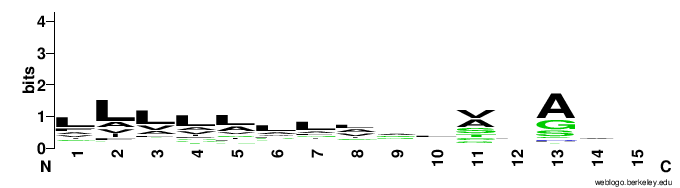

In [ ]:
df_benchmark_2 = df_benchmark.assign(Prediction = y_test_pred) # 0 = NO_SP , 1 = SP
# False positives are 'Class' == NO_SP and 'Predicted' == 1
# True negatives are 'Class' == NO_SP and 'Predicted' == 0
df_benchmark_2

### List fase negatives

In [ ]:
df_false_negatives = df_benchmark_2.loc[df_benchmark_2['Class'] == 'SP']
df_false_negatives = df_false_negatives.loc[df_false_negatives['Prediction'] == 0]

sp_length_benchmark = df_false_negatives['SP cleavage-site annotation'].str.count('S').tolist()
#I add a new column with the lengths
df_false_negatives = df_false_negatives.assign(s_length= sp_length_benchmark)

#extract the cleavage sequences
cleavage_sequences = []
for sequence in df_false_negatives['Sequence (first 50 N-terminal residues)']:
  for n in df_false_negatives['s_length']:
    cleavage_sequences.append(sequence[:n])
cleavage_sequences

#aligned cleavage sequences

length = df_false_negatives['s_length']
seq = df_false_negatives['Sequence (first 50 N-terminal residues)']
#calculates the cleavage site
cleavage_seq=[] #add to list all the cleaveage sites sequences
for l,s in zip(length, seq ):
    cleavage_seq.append(s[l - 13:l + 2])
cleavage_seq

benchmark_false_negatives_cleavage = cleavage_seq
benchmark_false_negatives_cleavage

with open('cleavage_benchmark_sequences_false_negatives', 'w') as fp:
    for item in benchmark_false_negatives_cleavage:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

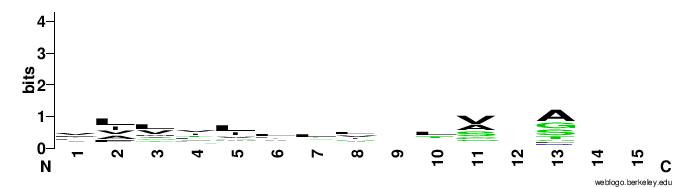

In [ ]:
training_seq_list_sp
with open('cleavage_training_sequences', 'w') as fp:
    for item in training_seq_list_sp:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

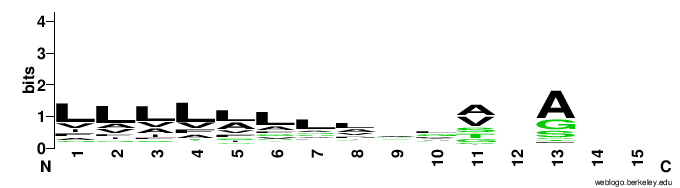

In [ ]:
df_false_negatives = df_benchmark_2.loc[df_benchmark_2['Class'] == 'SP']
df_false_negatives = df_false_negatives.loc[df_false_negatives['Prediction'] == 0]

df_false_positives = df_benchmark_2.loc[df_benchmark_2['Class'] == 'NO_SP']
df_false_positives = df_false_positives.loc[df_false_positives['Prediction'] == 1]

In [ ]:
##Pie plot according to the kingdom
df_false_negatives['Counts'] = np.zeros(len(df_false_negatives))
grp_df_false = df_false_negatives.groupby('Kingdom').count()
grp_df_false = grp_df_false.sort_values(by='Counts',ascending=False)
grp_df_false = grp_df_false.drop(grp_df_false.columns[[1, 2,3,4,5,6]], axis=1)
grp_df_false.columns=['Counts']
grp_df_false.plot(kind='pie', y='Counts', autopct='%.0f%%',colors=['skyblue','plum','mediumspringgreen','bisque','lightcoral','pink'])

In [ ]:
##Pie plot according to the kingdom
df_false_positives['Counts'] = np.zeros(len(df_false_positives))
grp_df_false_positives = df_false_positives.groupby('Kingdom').count()
grp_df_false_positives = grp_df_false_positives.sort_values(by='Counts',ascending=False)
grp_df_false_positives = grp_df_false_positives.drop(grp_df_false_positives.columns[[1, 2,3,4,5,6]], axis=1)
grp_df_false_positives.columns=['Counts']
grp_df_false_positives.plot(kind='pie', y='Counts', autopct='%.0f%%')